# Executive Summary:
This Notebook will make an Exploratory Data Analysis of the Wine Database Collected from the previous notebook. 

In [1]:
# This cell places figures to the centre 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
# Reading the csv file generated from previous notebook

wine_df = pd.read_csv('/home/docode/project/Wine Data Collection from Vivino/wine_df.csv',index_col = [0]) # wine_df.csv file was created in the data_collection directory

wine_df

,wine name,winery,wine year,wine rating,wine price,wine type,wine region,wine country,grape information,wine acidity,wine intensity,wine sweetness,wine tannin,wine description
0,Cabernet Sauvignon,Carta Vieja,2019,3.4,4.99,Red,Loncomilla Valley,Chile,Cabernet Sauvignon,3.043747,3.781781,1.772746,3.164342,Cabernet Sauvignon is the most widely grown gr...
1,Merlot,Carta Vieja,2019,3.4,4.99,Red,Loncomilla Valley,Chile,Merlot,2.020424,3.482722,1.949938,2.366192,Merlot is a staple of the wine producing regio...
2,Cabernet Sauvignon,Three Wishes,N.V.,3.1,4.99,Red,California,United States,Cabernet Sauvignon,3.206160,4.545627,1.962006,3.569953,"Known as the king of red wine grapes, Cabernet..."
3,Cabernet Sauvignon,Crane Lake,2016,3.4,4.99,Red,California,United States,Cabernet Sauvignon,3.014199,4.738935,1.743180,3.540428,"Known as the king of red wine grapes, Cabernet..."
4,Pinot Noir,Crane Lake,2016,3.4,4.99,Red,California,United States,Pinot Noir,3.405433,2.832203,1.500866,2.147871,Pinot Noir has the well deserved reputation of...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21976,10 Years Old White Port,Quinta de Santa Eufémia,N.V.,4.1,29.99,Fortified,Porto,Portugal,Gouveio,NaN,NaN,NaN,NaN,NaN
21977,Late Bottled Vintage Port,Quinta do Crasto,2015,4.2,27.48,Fortified,Porto,Portugal,Touriga Nacional,NaN,NaN,NaN,NaN,NaN
21978,Pedro Ximenez 1827 Jerez-Xeres-Sherry,Osborne,N.V.,3.9,17.59,Fortified,Pedro Ximénez Sherry (PX),Spain,Pedro Ximenez,2.871021,4.823324,4.946997,NaN,NaN
21979,Lagrima Fine White Port,Krohn,N.V.,3.8,12.52,Fortified,Porto,Portugal,Gouveio,NaN,NaN,NaN,NaN,NaN


# Explaratory Data Analysis

### Questions to ask:


- Number of Wines by Grape Information.
- Top Wineries
- Variation of Wines by Country and Region
- Wine Price Variation
- Best Countries By Ratings
- Do the Grape Information by the price range. The range of price can be by 10
- Variation between 
- Description of Wine Price/ Acidity 





## Number of Wines by Wine Type

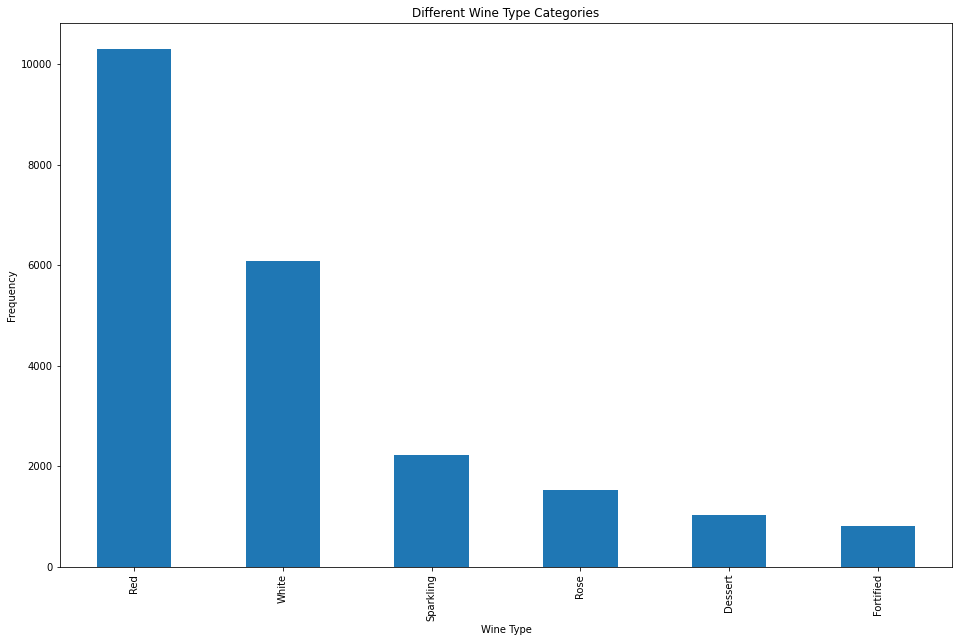

In [4]:
plt.figure(figsize=(14,16))

wine_df['wine type'].value_counts().plot(kind = 'bar', figsize = (16,10),   title = 'Different Wine Type Categories');
plt.xlabel('Wine Type');
plt.ylabel('Frequency');


### Wine Ratings Distribution

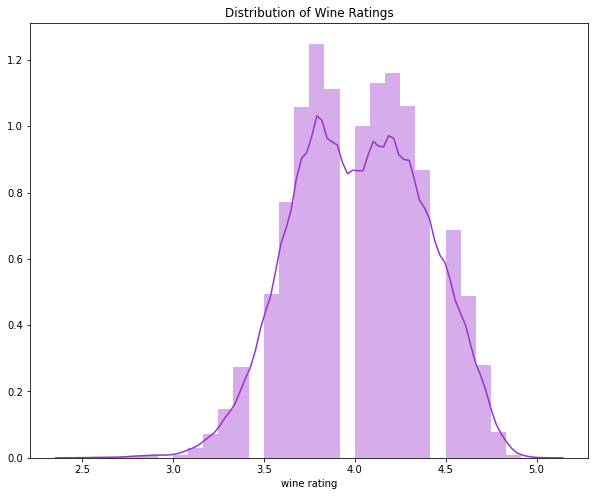

In [10]:
plt.figure(figsize = (10, 8))
sns.distplot(wine_df['wine rating'], bins = 30, color = 'darkorchid')
plt.title('Distribution of Wine Ratings');

We have two local peaks where Wine Rating is 3.7 and 4.3. We also can see that there are almost no wines with rating less than 2.5

### Wine Price Distribution and Variation

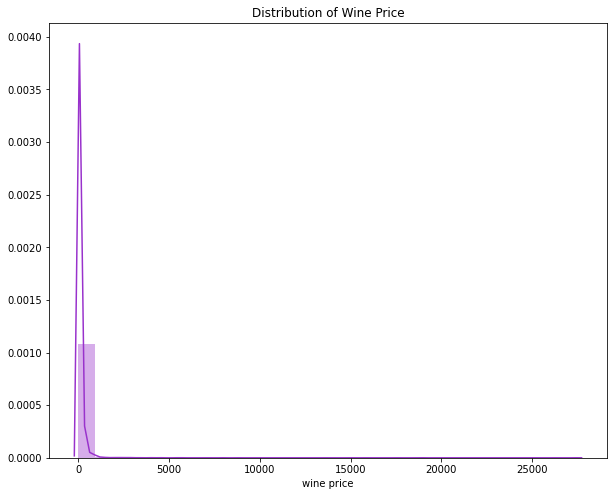

In [11]:
plt.figure(figsize = (10, 8))
sns.distplot(wine_df['wine price'], bins = 30, color = 'darkorchid')
plt.title('Distribution of Wine Price');

We can see that Data is Extremely Right Skewed and most of the data are within 0 - 500 USD price range. We can limit the spread by deleting the outliers i.e.  Wines that have extremely high price  

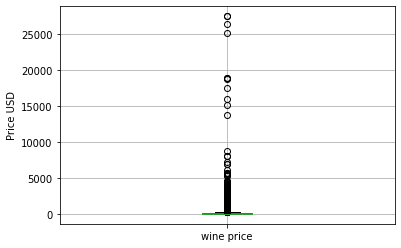

In [12]:
# Let's see a boxplot of Wine Price variation
boxplot = wine_df.boxplot(column = ['wine price'])
plt.ylabel('Price USD');

We can see from the boxplot that there are number of wines that have a price tag above 5,000 USD. Since there are a number of wines between the box and 5,000 USD mark, I will keep them for now. 

In [13]:
print('Row number before deleting a few extravagant wines that have a price tag of 5,000 + USD:', wine_df.shape[0])
wine_df = wine_df.drop(wine_df[wine_df['wine price'] > 5000].index)
print('Row number now:', wine_df.shape[0])

Row number before deleting a few extravagant wines that have a price tag of 5,000 + USD: 21981
Row number now: 21956


In the cell below we can see a boxplot of wines that have price tags between 0 and 5000 USD:

Number of wines with price of 500+: 557


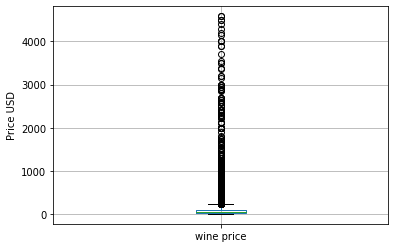

In [14]:

boxplot = wine_df.boxplot(column = [ 'wine price'])
plt.ylabel('Price USD');

print('Number of wines with price of 500+:', len(wine_df[wine_df['wine price'] > 500]))

There are 557 unique wines that have a price higher than 500 dollars. It won't make a damage to delete the data since wines that cost 500+ USD account for about 2.5% of all dataset. I will keep all of the data for now.

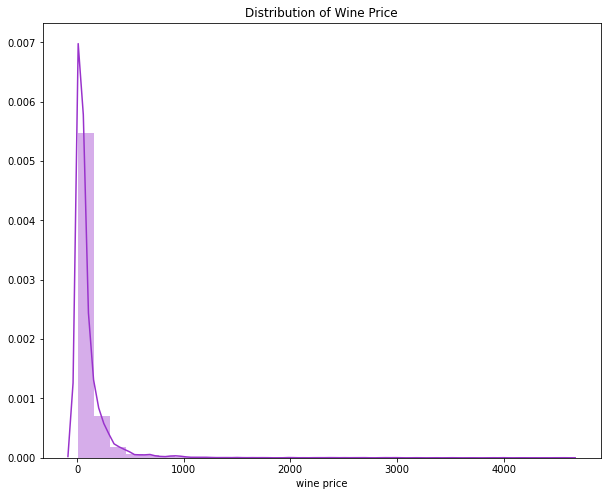

In [15]:
# Wine Price Distribution after deleting really expensive wines
plt.figure(figsize = (10, 8))
sns.distplot(wine_df['wine price'], bins = 30, color = 'darkorchid')
plt.title('Distribution of Wine Price');

It is better now, but distribution is still extremely highly right-skewed. I will transform it to the normal-like distribution. That would be useful for regression techniques 


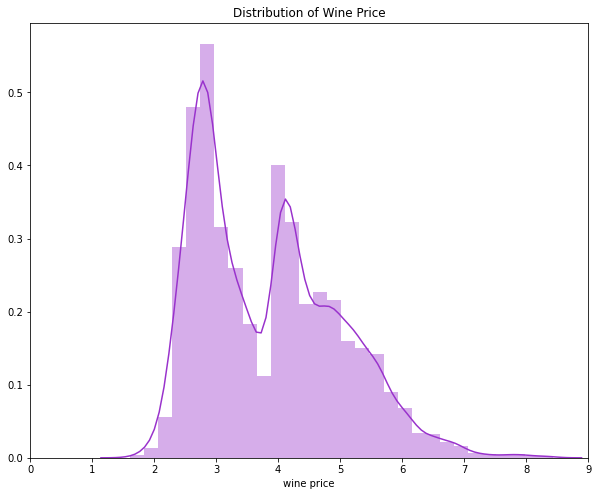

In [16]:
# Need to convert price to log-price in the dataframe

plt.figure(figsize = (10, 8))

wine_df_log = np.log(wine_df['wine price'])

sns.distplot(wine_df_log, bins = 30, color = 'darkorchid')
plt.xlim(0,9)
plt.title('Distribution of Wine Price');

Let's keep for now all the wines between 500 and 5,000 dollars.

### Cleaning of Wine Description Column 

There are some newline characters found in the wine description column. I am planning to use the wine descriptions to build a recommendation system, so I will clean unnecessary data. To do this I use the lambda function. 

In [17]:
# Deleting unncecessary newline characters with lambda function
wine_df['wine description'] = wine_df['wine description'].apply(lambda x: str(x).replace('\n\n', ''))

# Example of wine description
wine_df['wine description'][0]

'Cabernet Sauvignon is the most widely grown grape in the New World. Cabs from Chile have an elegance and earn great respect due to the complexity and diversity of characteristics, stemming from nuances of what the Chilean landscape gives to the grape.Thick skins lead to classicly high tannins, and strong red and black fruit-forward characteristics on both the nose and palate.The grape originates from France and is one of the 5 original grapes of Bordeaux. Chemical compound in the grape give it a distinct note of green peppers.This wine loves to be aged in oak. Chilean Cabs usually age in American oak for 1-2 years which gives them classic hints of vanilla, spice, and tobacco.The really fun thing about Chilean Cabs is that you can get a wide variety of flavors on the palate depending on where in the country they originate. One should spend time getting to know the differences that Chilean Cabs have to offer.'

### Distribution of Wines by Year

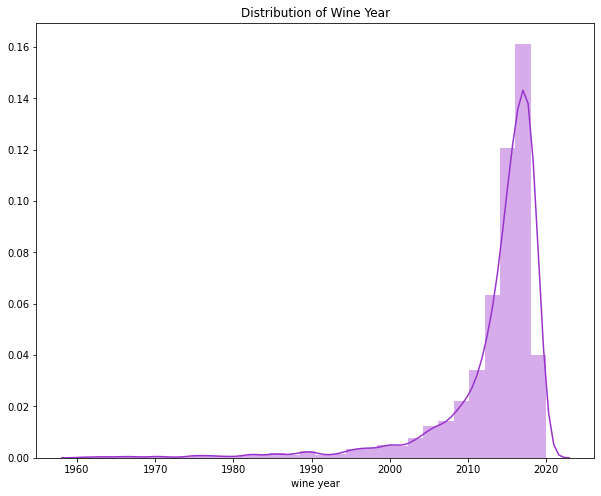

In [18]:
plt.figure(figsize = (10, 8))

# Replace wine year with NaN if N.V is present in the dataset, otherwise convert it to float
wine_df['wine year'] = wine_df['wine year'].apply(lambda x: np.nan if x == 'N.V.'  else float(x))

# Distribution of Wines from 1960 and onwards
sns.distplot(wine_df['wine year'][wine_df['wine year'] > 1960] , bins = 30, color = 'darkorchid')
plt.title('Distribution of Wine Year');

We now could see that the data has a right skewed distribution. This makes sense since most of the wines presented on Vivino catalogue were produced in the past few years. No need to normalize the data

Let's Explore Correlation between the year when the wine vintage was released and its price:

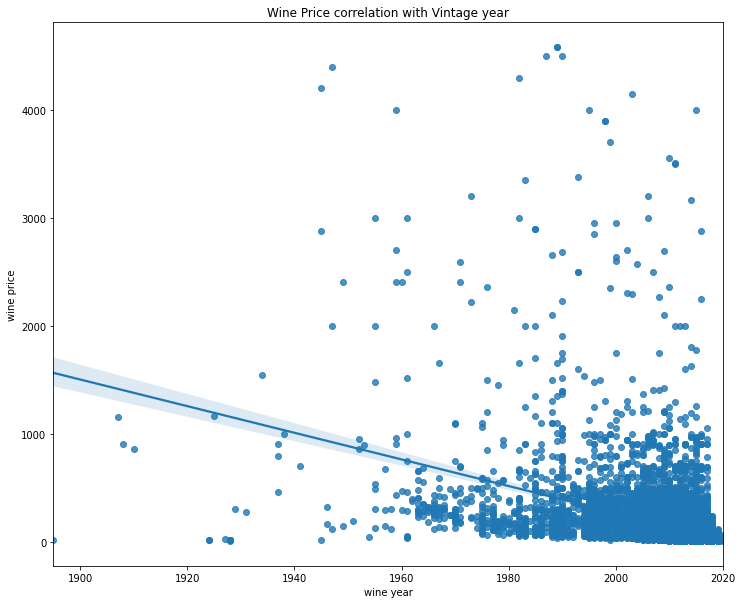

In [19]:
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.regplot(x = wine_df['wine year'], y = wine_df['wine price'], ax = ax).set_title('Wine Price correlation with Vintage year');


From the regression plot above we can see that wine price tends to generally increase with older wine vintages. However,
it is hard to build an objective line because most of the wine data comes from 1995 vintages and onwards, while other dates have small amount and spread of data. 

Below is the same plot but starting from 1990's and onwards.  it presents a more objective regression line.

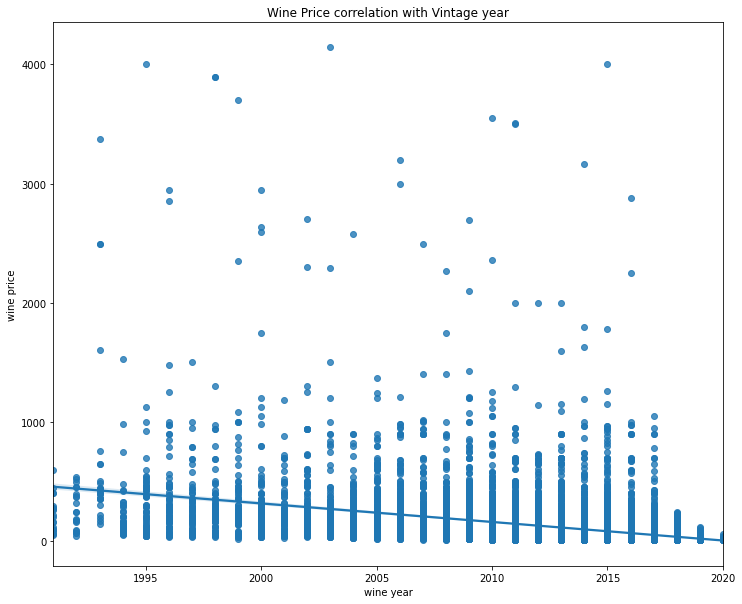

In [20]:
fig_dims = (12, 10)

fig, ax = plt.subplots(figsize=fig_dims)

sns.regplot(x = wine_df['wine year'][wine_df['wine year'] > 1990], y = wine_df['wine price'][wine_df['wine year'] > 1990], ax = ax).set_title('Wine Price correlation with Vintage year');

In [21]:
# Function below allows to filter some parameters and leave the most important ones. Useful for data visualization and used in the next cells 
def top_data(dataframe, column_name, filter_number):
    
    # List of unique values in column
    unique_column_values = column_name.unique()

    filtered_list = []

    for my_filter in unique_column_values:
        # If column values are higher than  number, it passes the filter  
        if (len(dataframe[column_name == my_filter]) > filter_number):            
            filtered_list.append(my_filter)

    data = pd.DataFrame([])       

    for i in range(len(filtered_list)):
        new_df = dataframe[column_name == filtered_list[i]]
        data = data.append(new_df)
    return data

### Number of Different Grapes used to produce Wines

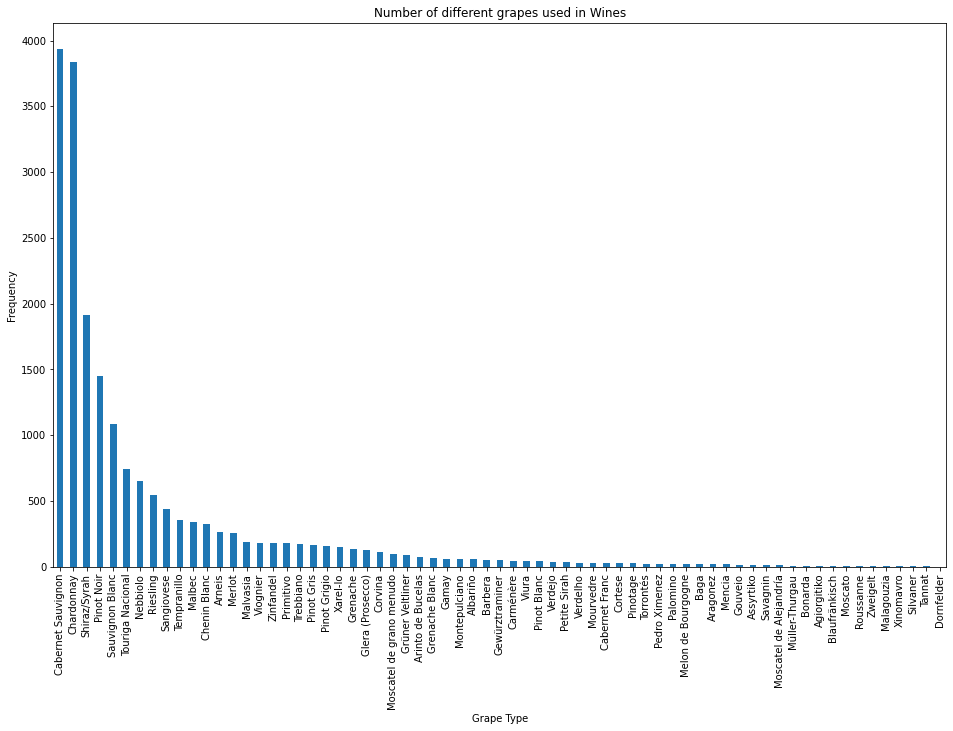

In [22]:
# Number of different grapes used in Wines
plt.figure(figsize=(14,16))


wine_df['grape information'].value_counts().plot(kind = 'bar', figsize = (16,10),   title = 'Number of different grapes used in Wines');
plt.xlabel('Grape Type');
plt.ylabel('Frequency');


We can see that the most popular grapes out of which wines are made are Cabernet Sauvignon primarily used for red wines and Chardonnay used for white wines 

Let's explore the average rating of the most popular grape types used to produce wine:

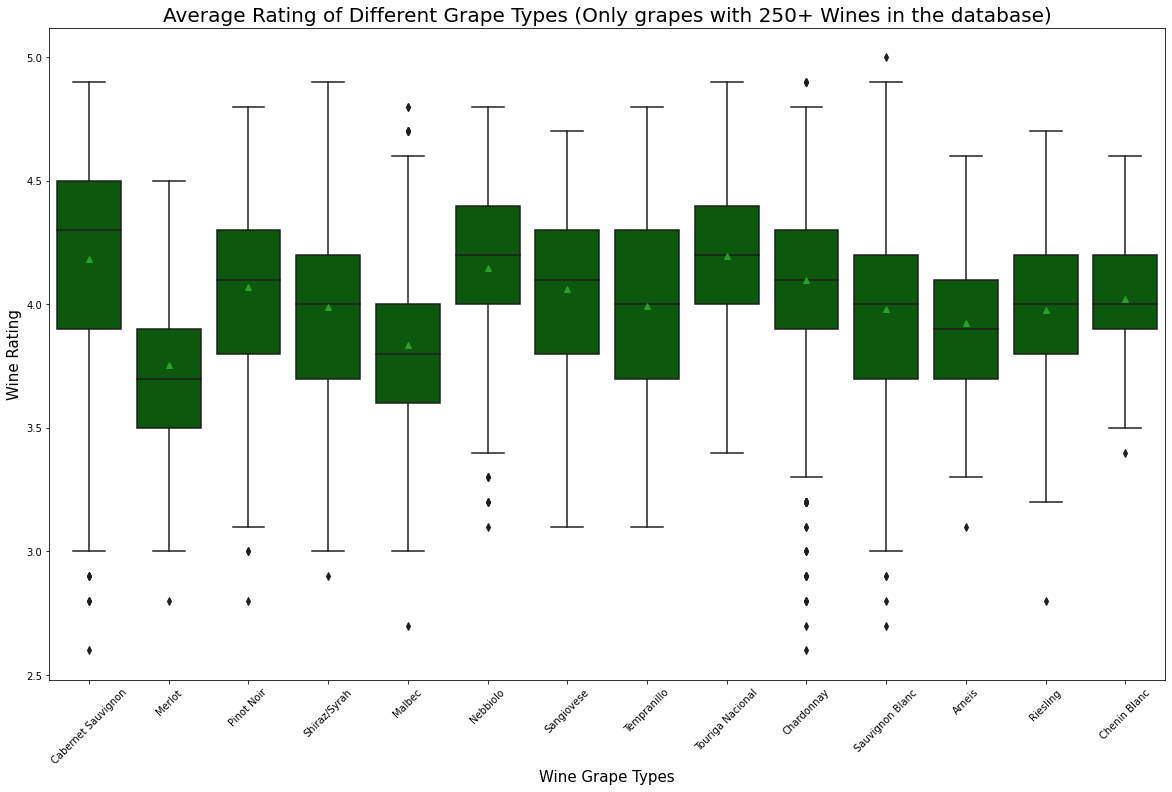

In [23]:
# Using function defined before: 250 is the minimum number of wines required to visualize grape in the bar chart below
data = top_data(wine_df, wine_df['grape information'], 250)

# Determine the order of boxes
plt.figure(figsize = (20, 12))
g = sns.boxplot(x='grape information', y='wine rating',
                  data= data, showmeans = True, 
                 color='darkgreen')

g.set_title("Average Rating of Different Grape Types (Only grapes with 250+ Wines in the database)", fontsize=20)
g.set_xlabel("Wine Grape Types", fontsize=15)
g.set_ylabel("Wine Rating", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45);

We can see tha Cabernet Sauvignon and Sauvignon Blanc has the highest spread of ratings. Lowest spread is observed for Chenin Blanc (Out of the ones that have more than 250 wines)

# Top 30 Wine Producers in Wine Database 

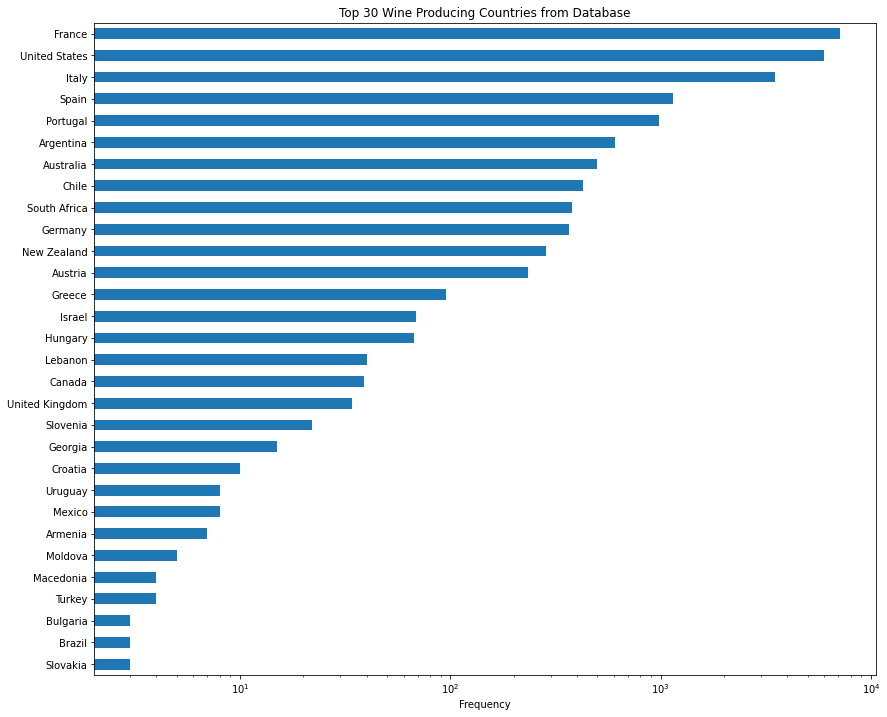

In [24]:
wine_df['wine country'].value_counts().head(30).sort_values(ascending = True).plot(kind = 'barh', figsize = (14, 12), label = True);
plt.xscale('log')
plt.xlabel('Frequency');
plt.title('Top 30 Wine Producing Countries from Database');

# Top 30 Producing Regions in Wine Database


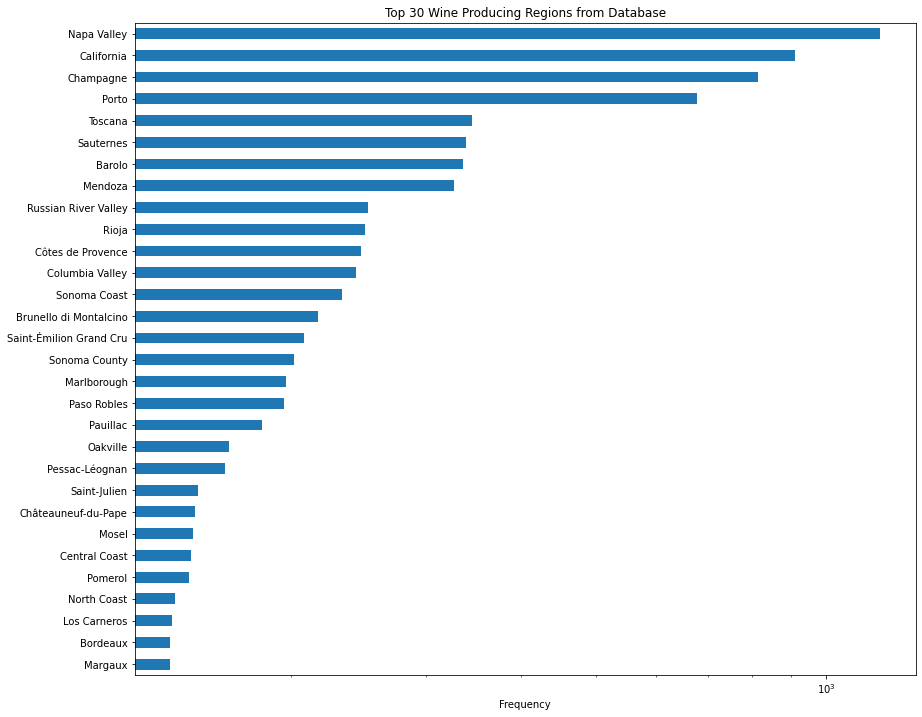

In [25]:
wine_df['wine region'].value_counts().head(30).sort_values(ascending = True).plot(kind = 'barh', figsize = (14, 12), label = True);
plt.xscale('log')
plt.xlabel('Frequency');
plt.title('Top 30 Wine Producing Regions from Database');

# Top 30 Producing Wineries in Database

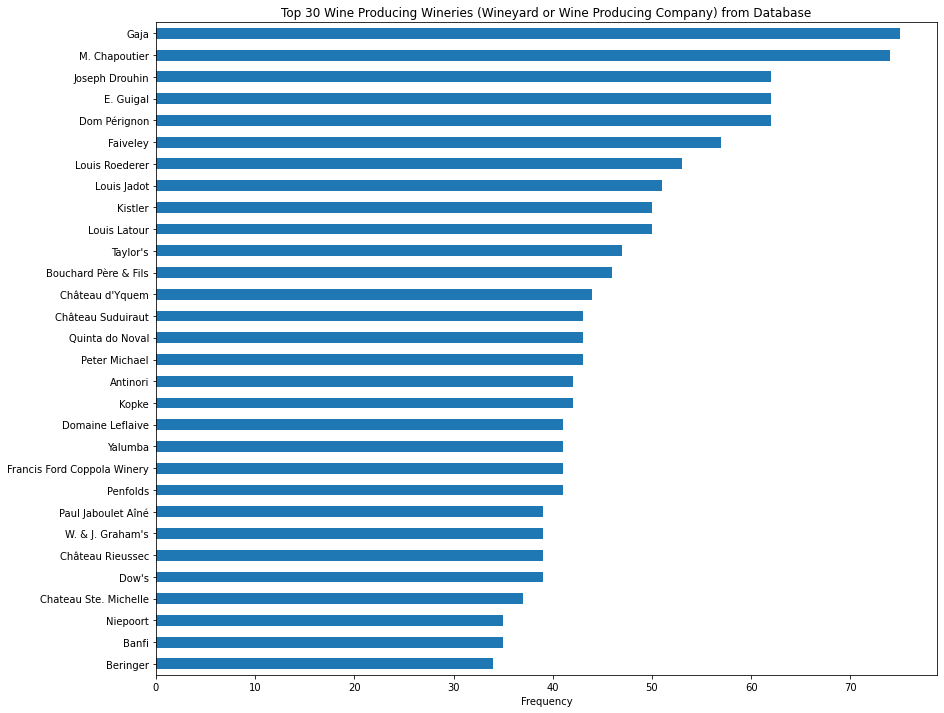

In [26]:
wine_df['winery'].value_counts().head(30).sort_values(ascending = True).plot(kind = 'barh', figsize = (14, 12), label = True);
plt.xlabel('Frequency');
plt.title('Top 30 Wine Producing Wineries (Wineyard or Wine Producing Company) from Database');

# Average Wine Rating by Country

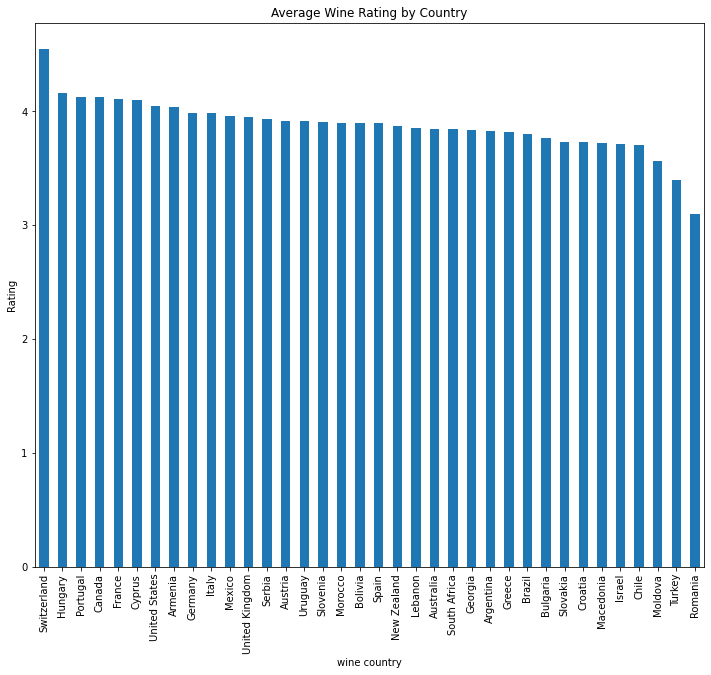

In [27]:
# Average rating in one country: Country in X-axis; Rating in Y-axis.
wine_df.groupby('wine country').mean()['wine rating'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 10));
plt.ylabel('Rating');
plt.title('Average Wine Rating by Country');


At first, we can assume that Switzerland and Hungary have best rated wines on average, but after closer look we can see that both of them have only 3 wines in the dataset. Therefore, I have filtered out countries that have less than 500 wines present in the dataset.

Number of countries that have more than 250 wines in the database: 11


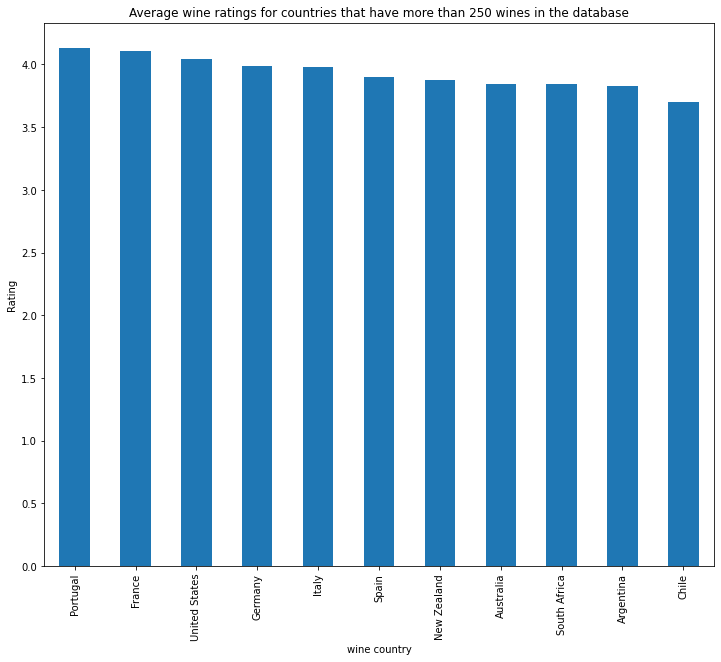

In [28]:
# Let's see which country has the highest rating among the big wine producers
data = top_data(wine_df, wine_df['wine country'], 250)

print('Number of countries that have more than 250 wines in the database:', data['wine country'].nunique() )

# New Rating chart
data.groupby('wine country').mean()['wine rating'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 10));
plt.ylabel('Rating')
plt.title('Average wine ratings for countries that have more than 250 wines in the database');

We can now see that there are 11 countries that have produces more than 250 unique wines. Portugal has the highest average wine rating followed by France. All three countries have average rating higher than 4.0  

It should be noted that the average rating includes all types of wines(Red, White, Sparkling, Rose, Dessert and Fortified).

Most of the wines from Portugal were Fortified which has a higher average rating compared to other types of Wines. You can see that from the cell below

In [29]:
print('Different Portugese Wine Types:\n', wine_df['wine type'][wine_df['wine country'] == 'Portugal'].value_counts())

# Most of the wines from Portugal are Fortified Wines.



Different Portugese Wine Types:
 Fortified    718
Red          108
White        102
Rose          25
Sparkling     19
Dessert        7
Name: wine type, dtype: int64


Out of total 811 Fortified wines (from cell below), 718 of them come from Portugal. And since Fortified wines have high rating, it results in Portugal having the highest rating among other countries. Also, France and US have higher representation in the dataset than Portugal. This makes France the country that has highest average rating from those that have high representation of wines and has a variation of wine types

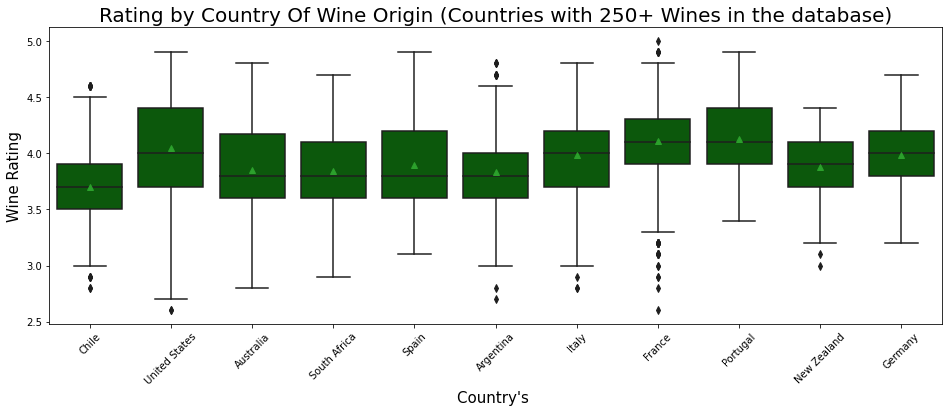

In [30]:
# Box Plot:
data = top_data(wine_df, wine_df['wine country'], 250)


data

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)

g = sns.boxplot(x='wine country', y='wine rating',
                  data= data, showmeans = True,
                 color='darkgreen')

g.set_title("Rating by Country Of Wine Origin (Countries with 250+ Wines in the database)", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Wine Rating", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45);



Box Plot Confrirms earlier observations, Portugal has slightly higher mean than France, but median value is roughly same. Additionally, Wines from Portugal have higher rating in the IQR.

# Average Wine Price By Country

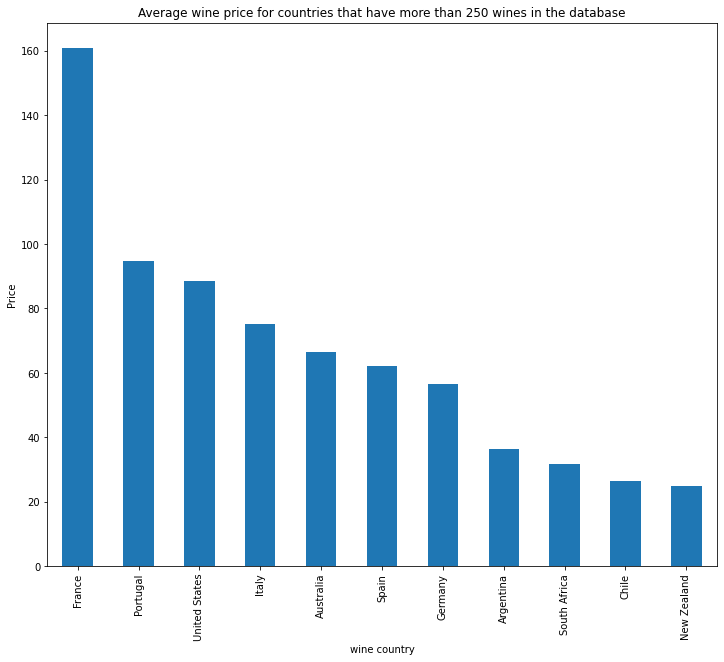

In [31]:
data.groupby('wine country').mean()['wine price'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 10));
plt.ylabel('Price')
plt.title('Average wine price for countries that have more than 250 wines in the database');

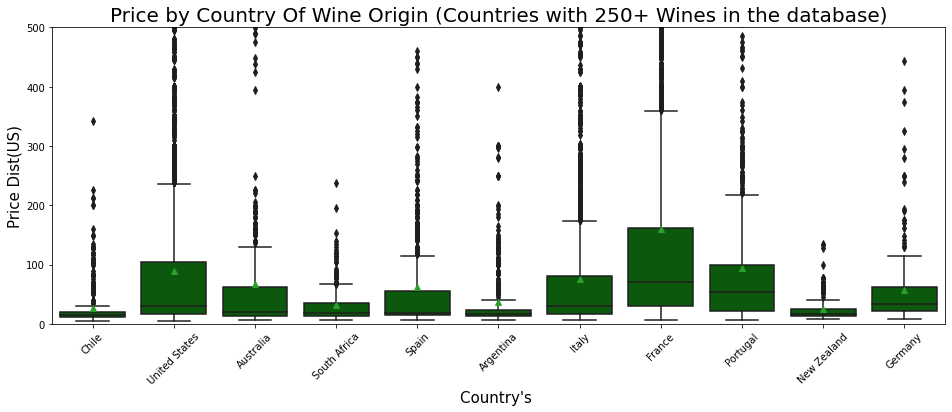

In [32]:
data = top_data(wine_df, wine_df['wine country'], 250)

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)

g = sns.boxplot(x='wine country', y='wine price',
                  data= data, showmeans = True,
                 color='darkgreen')

g.set_title("Price by Country Of Wine Origin (Countries with 250+ Wines in the database)", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45);
plt.ylim(0, 500);


Amongst all big wine producers, Chile, New Zealand and Argentina have the cheapest wines. Their mean, median and Inter Quartile Ranges (IQR) are smaller compared to other ones. On the contrary, France can be declared as the most expensive one with highest median, mean and 75th Quartile Range


# Price by Winery

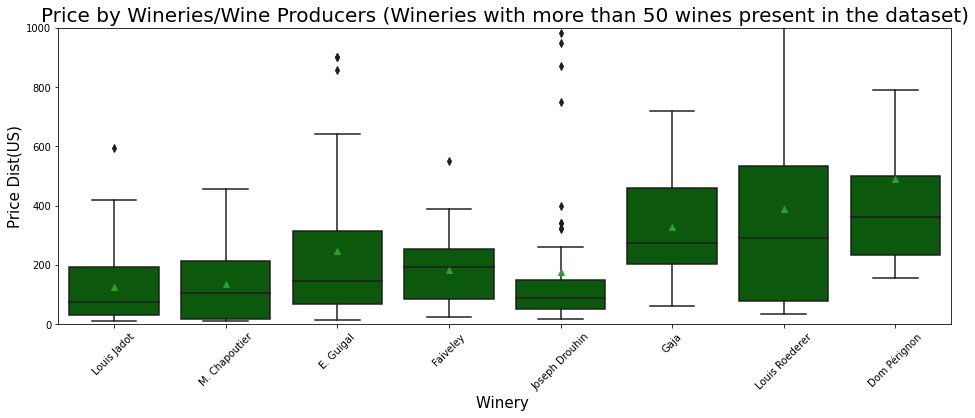

In [33]:
data = top_data(wine_df, wine_df['winery'], 50)

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)

g = sns.boxplot(x='winery', y='wine price',
                  data= data, showmeans = True,
                 color='darkgreen')

g.set_title("Price by Wineries/Wine Producers (Wineries with more than 50 wines present in the dataset)", fontsize=20)
g.set_xlabel("Winery ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45);
plt.ylim(0, 1000);


Most expensive winery in the dataset is Louis Roederer.

# Wine Description vs Rating Boxplot

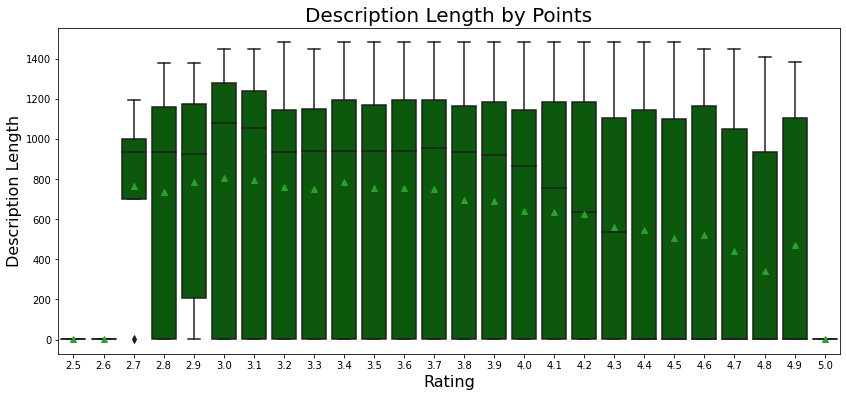

In [34]:
df_wine1 = wine_df.assign(desc_length = wine_df['wine description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='wine rating', y='desc_length', data=df_wine1, showmeans = True,
                color='darkgreen')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Rating', fontsize = 16) # X label
plt.show()

It is interesting to see that we do not have a visible correlation between the description length of a wine and it is rating. I would expect that the wine with longer description will have higher rating. Conversely, the higher the rating, lower description length is observed. Only wines with the lowest ratings (2.5 and 2.6) had no wine description available.

# Average Rating by Wine Type

Number of wine types in the dataframe:
 Red          10287
White         6074
Sparkling     2230
Rose          1534
Dessert       1020
Fortified      811
Name: wine type, dtype: int64


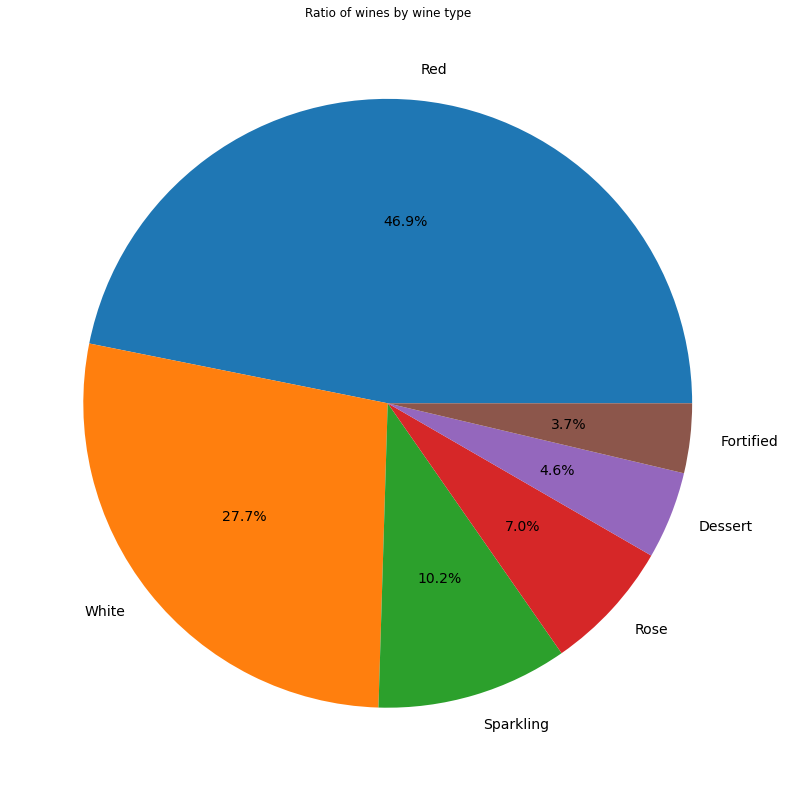

In [35]:
print('Number of wine types in the dataframe:\n', wine_df['wine type'].value_counts())

wine_df['wine type'].value_counts().plot(kind = 'pie', figsize = (16, 14), autopct = '%1.1f%%' ,title = 'Ratio of wines by wine type', label = '', fontsize = 14); 


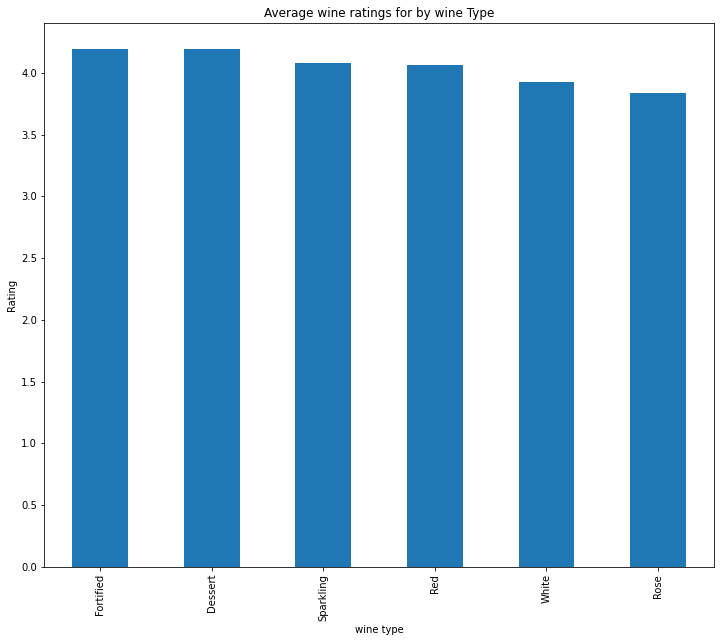

In [36]:
wine_df.groupby('wine type').mean()['wine rating'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 10));
plt.ylabel('Rating')
plt.title('Average wine ratings for by wine Type');


Fortified wine has the highest rating and Rose has the lowest one. The spread of wine ratings is small: Rose has an average of 3.85 and Fortified 4.19

# Wine Types by Average Price

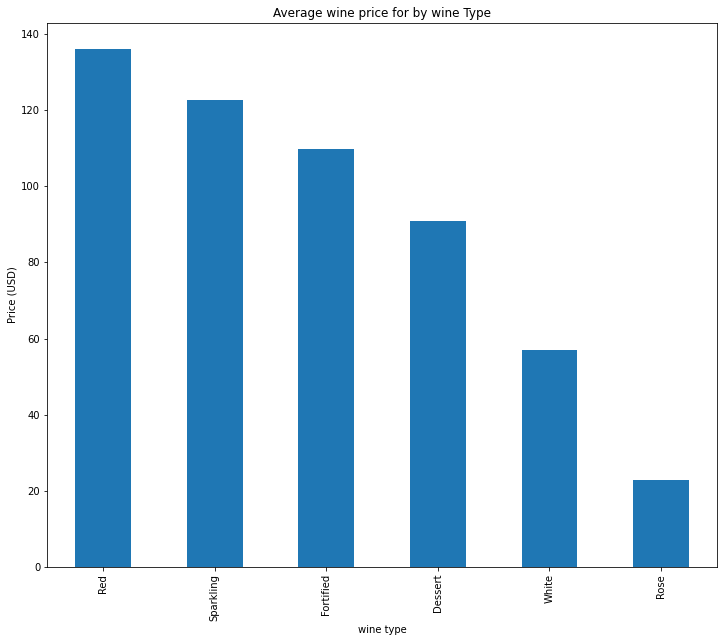

In [37]:
wine_df.groupby('wine type').mean()['wine price'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 10));
plt.ylabel('Price (USD)')
plt.title('Average wine price for by wine Type');


We can observe a big spread of wine price that depends on its type. Red Wines are the most expensive with a price of 135 USD and Rose are the cheapest ones with 30 USD 

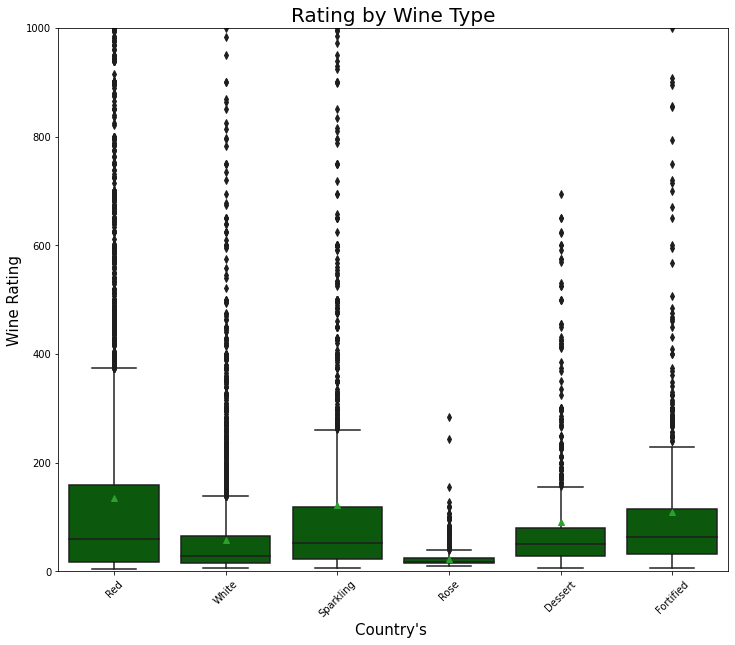

In [38]:
# Wine Rating by Type Box Plot
plt.figure(figsize = (12, 10))
g = sns.boxplot(x='wine type', y='wine price',
                  data= wine_df, showmeans = True,
                 color='darkgreen')

g.set_title("Rating by Wine Type", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Wine Rating", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45);

plt.ylim(0, 1000);


Red Wine has the highest mean and Interquartile Range compared to other types of wines. 

# Variations of Wine Prices

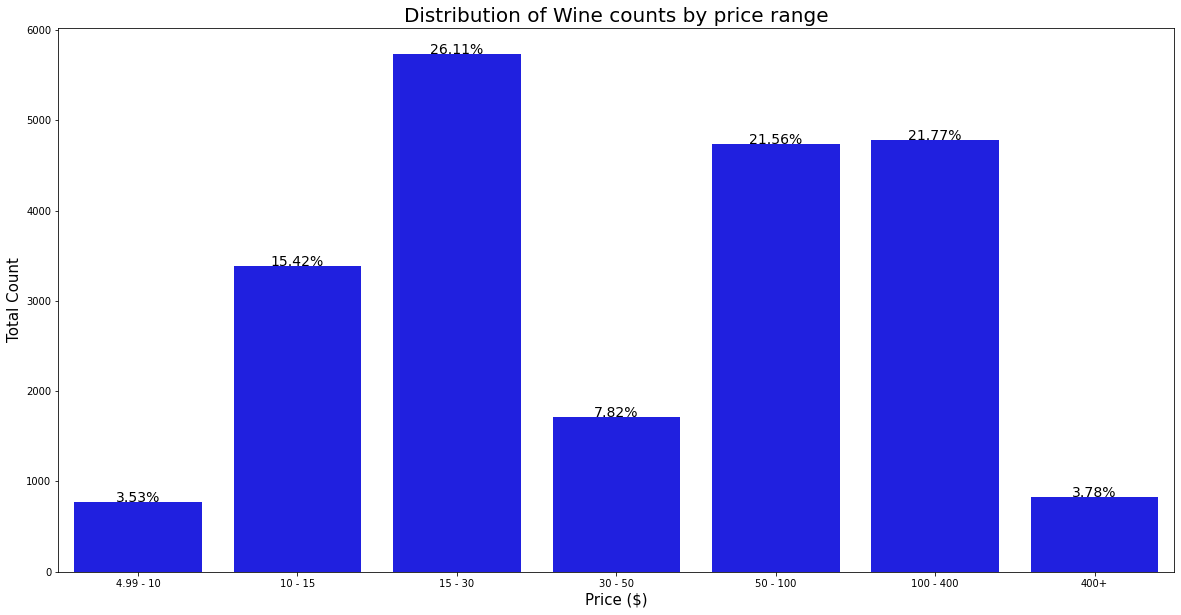

In [39]:
# Convert int value of wine price column to ranges 
df = wine_df.copy()
bins = [4.99, 10,  15, 30, 50, 100, 400, 5000]
labels = ['4.99 - 10', '10 - 15', '15 - 30', '30 - 50', '50 - 100', '100 - 400', '400+']
df['wine price'] =  pd.cut(df['wine price'], bins, labels = labels, include_lowest = True)

total = len(df)
plt.figure(figsize=(20,10))

g = sns.countplot(x='wine price', color='blue',
                  data=df)
g.set_title("Distribution of Wine counts by price range", fontsize=20)
g.set_xlabel("Price ($)", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

# Sets percentages above the bars
for point in g.patches:
    height = point.get_height()
    width = point.get_width()
    x = point.get_x()
    y = point.get_y()
    g.text(x + width/2., height, '{:1.2f}%'.format((height/total) * 100), ha = 'center', fontsize =14)

A fourth of wines in database are in the range between 15 and 30 USD. Next, the wines that have price range between 50 and 100 USD have 21.77% and 100 and 400 USD have 21.73 USD

We can also note that around 53% of all wines are between 4.99 and 50 USD.

# Correlations and Their Explorations

Let's see the correlation between the features. Currently, I have 7 numerical features that I would want to explore: may be there will be some kind of relationship between them.

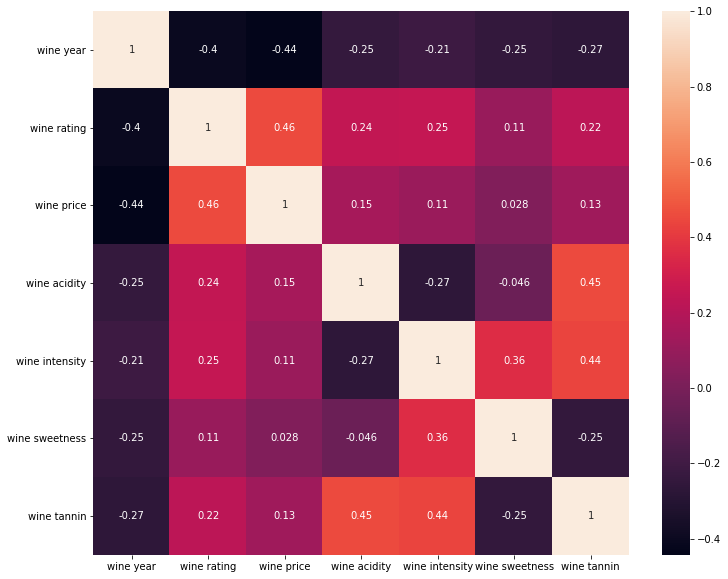

In [40]:
wine_df['wine year'] = wine_df['wine year'].astype(float)

fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(wine_df.corr(), annot = True, ax = ax);

Highest positive correlations are observed between wine tasting features such as wine tannin and wine intensity (0.44), wine tannin and acidity (0.45).

Highest negative correlation is for wine price vs wine year


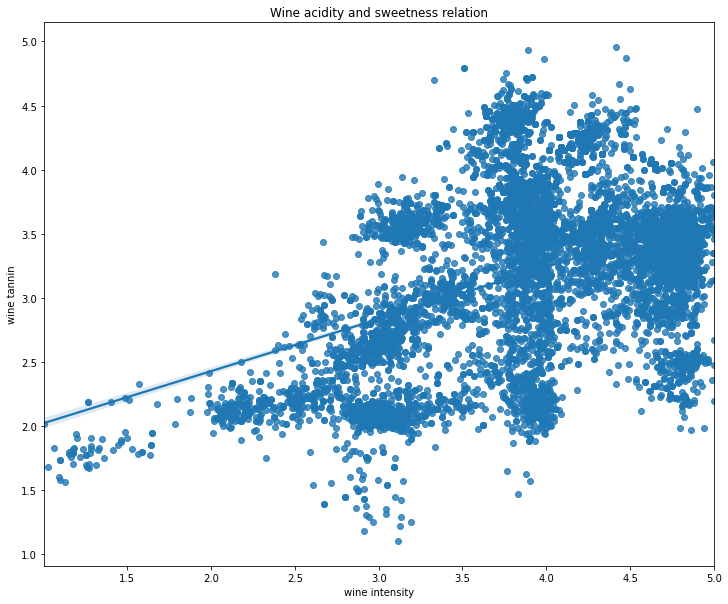

In [41]:
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(data = wine_df, x = 'wine intensity', y = 'wine tannin', ax = ax).set_title('Wine acidity and sweetness relation');


We can see that with the increase of wine intensity there is also some increase in wine tannin

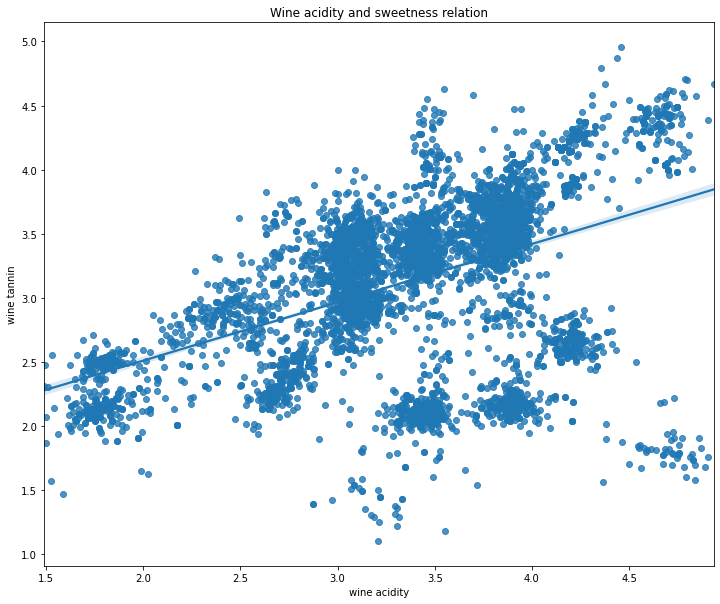

In [42]:
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(data = wine_df, x = 'wine acidity', y = 'wine tannin', ax = ax).set_title('Wine acidity and sweetness relation');


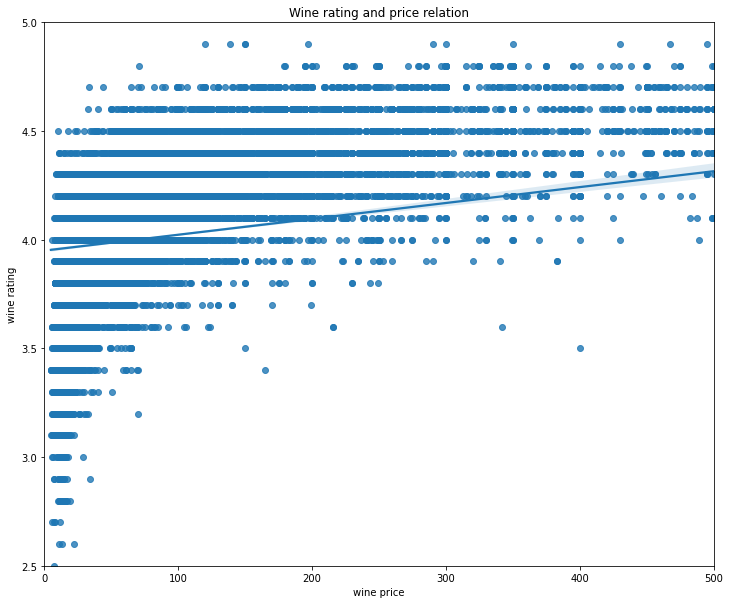

In [43]:
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(data = wine_df, x = 'wine price', y = 'wine rating', ax = ax).set_title('Wine rating and price relation');

plt.ylim(2.5, 5);
plt.xlim(0,  500);


We can see that with increase in wine price there is a increase in rating of a wine. We also can note that on the lower price scale, the rating spreads widely. With increase in price the rating gap is narrowing more and more. For example, on the left side the rating varies from 2.5 to 4.5, but the wines that have 500 USD price is rated between 4 and 4.8. So generally if a user buys an expensive there is a high chance that he will rate it as good or give a higher rating than the wine objectively deserves
.

0.8107364562899129

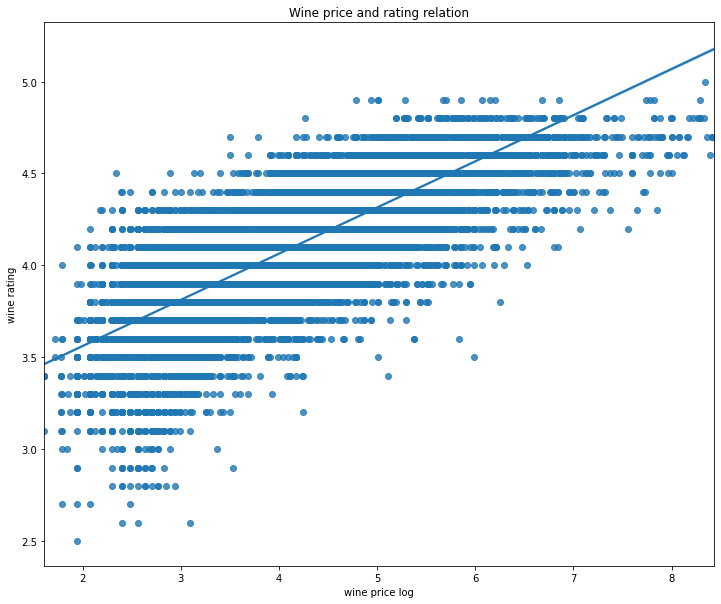

In [44]:
wine_df['wine price log'] = np.log(wine_df['wine price'])
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(data = wine_df, x = 'wine price log', y = 'wine rating', ax = ax).set_title('Wine price and rating relation');

wine_df['wine price log'].corr(wine_df['wine rating'])

If we normalize Price column with logarithm we can see a much better correlation: The Wine Rating clearly increases with increase in wine price.

In [45]:
wine_df.to_csv('new_wine.csv')

# Conclusion:
We have made a through EDA on the gathered dataset. This gave an insight about the market size and distribution of wine types by region. It also showed biggest wine producers, most expensive wine types, the variation of wine ratings by location and many more interesting points. 

# End of the EDA Notebook:
In the next notebooks I will build recommendation systems and will use Machine Learning algorithms to classify different types and wines and predict their quality (rating)